In [247]:
import sqlalchemy
from sqlalchemy import create_engine, MetaData, inspect, func, desc
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column,Integer, String, Numeric, Text, Float, Date
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [6]:
engine = create_engine('sqlite:///hawaii.sqlite',echo=False)

In [8]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [14]:
M = Base.classes.measurement
S = Base.classes.station

In [17]:
session = Session(engine)

In [48]:
station = session.query(S).filter(S.station == 'USC00519397').distinct()

for x in station:
    print("Station: {0}, Latitude:{1}, Name:{2}".format(x.station, x.latitude, x.name))

Station: USC00519397, Latitude:21.2716, Name:WAIKIKI 717.2, HI US


In [132]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

### Precipitation Analysis

In [212]:
#last 12 months dates

date_query = dt.datetime.now() - dt.timedelta(days=365)
date_query

datetime.datetime(2017, 4, 5, 15, 44, 36, 341382)

In [216]:

# to Pandas
df = pd.DataFrame((session.query(M.date, M.prcp).\
     filter(M.date >= date_query, M.date <=dt.datetime.now()).\
     all()), columns=['date', 'precipitation'])
df = df.dropna(axis=0)
df = df.reset_index(drop=True) 
df.head()

,date,precipitation
0,2017-04-06,0.0
1,2017-04-07,0.0
2,2017-04-08,0.0
3,2017-04-09,0.0
4,2017-04-10,0.0


In [218]:
df["date"] = pd.to_datetime(df["date"])

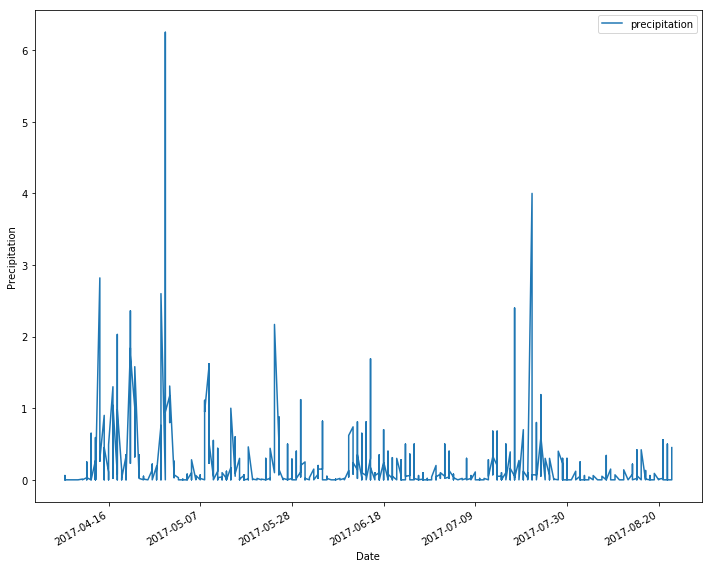

In [223]:
plot=df.set_index('date').plot(figsize=(10,8))
plot.set_ylabel('Precipitation')
plot.set_xlabel('Date')
plt.tight_layout()
plt.show()

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  <center><img src='images/temp_hist.png' height="400px" /></center>

In [342]:

st = session.query(M.station, func.count(M.station).label('counts')).\
    order_by(desc(func.count(M.station))).group_by(M.station)
print('-'*30)
print('List all Stations')
print('-'*30)
st.all()


------------------------------
List all Stations
------------------------------


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [296]:
st_df = pd.DataFrame(st.all(), columns=['station','count'])
#st_df =  pd.DataFrame(eval(st))
st_df

,station,count
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [317]:
print('This {0} has the most number of Observations {1}'. format(st[0].station,st[0].counts))

This USC00519281 has the most number of Observations 2772


In [ ]:
* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

In [372]:
st_1 = session.query(M.tobs).\
     filter(M.date >= date_query, M.date <=dt.datetime.now(), M.station == st[0].station)

In [373]:
st_1[0]

(67.0)

In [374]:
plot_st = [x[0] for x in st_1]

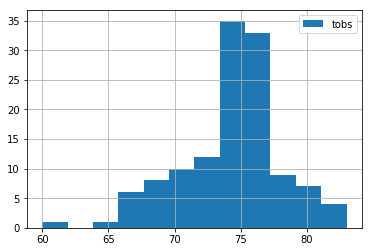

In [375]:
plot_hist = plt.hist(plot_st,bins=12)
plt.legend(['tobs'])
plt.tight_layout
plt.grid()
plt.show()

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='images/temp_avg.png' height="400px"/></center>

In [389]:
def calc_temps (start_date, end_date):
    temp= session.query(func.avg(M.tobs),func.min(M.tobs).label('min_temp'), func.max(M.tobs).label('avg_temp')).filter((M.date >= start_date) & (M.date <= end_date)).all()[0]
    return(temp)

In [391]:
temps=calc_temps('2017-01-01','2018-01-01')

In [393]:
temps.min_temp - 

58.0

In [385]:
y = range(len(temps))

<Container object of 3 artists>

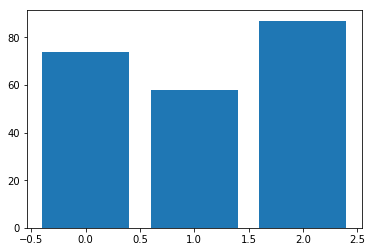

In [387]:
plt.bar(y,temps)